# Analisis Exploratorio de Datos(EDA)

## Importar Librerias necesarias

In [1]:
! pip install dask

In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para procesado paralelo/lectura masiva de metadatos (usa dask)
import dask.bag as bag
from dask import diagnostics

## Variables de entorno

In [3]:
carpeta_imagenes_originales = 'data/original/'
original_train_normal =carpeta_imagenes_originales+'train/NORMAL/'
original_train_pneumonia =carpeta_imagenes_originales+'train/PNEUMONIA/'
original_test_normal =carpeta_imagenes_originales+'test/NORMAL/'
original_test_pneumonia =carpeta_imagenes_originales+'test/PNEUMONIA/'
original_val_normal =carpeta_imagenes_originales+'val/NORMAL/'
original_val_pneumonia =carpeta_imagenes_originales+'val/PNEUMONIA/'

directorios={'train_normal':original_train_normal,
              'train_pneumonia':original_train_pneumonia,
              'test_normal':original_test_normal,
              'test_pneumonia':original_test_pneumonia,
              'val_normal':original_val_normal,
              'val_pneumonia':original_val_pneumonia}


## Muestra aleatoria de las imágenes originales

Se tomara aleatoriamente 3 imagenes por clase del conjunto train


### Seleccion aleatoria de imágenes

In [4]:
#display 2x3 con 3 imagenes al azar de nuemonia y 3 de normal del set de train

# Seleccionar 3 imágenes al azar de cada categoría  
normal_images = os.listdir(original_train_normal)
neumonia_images = os.listdir(original_train_pneumonia)
random_normal_images = random.sample(normal_images, 3)
random_neumonia_images = random.sample(neumonia_images, 3)



### cargar y mostrar imágenes aleatoriamente seleccionadas

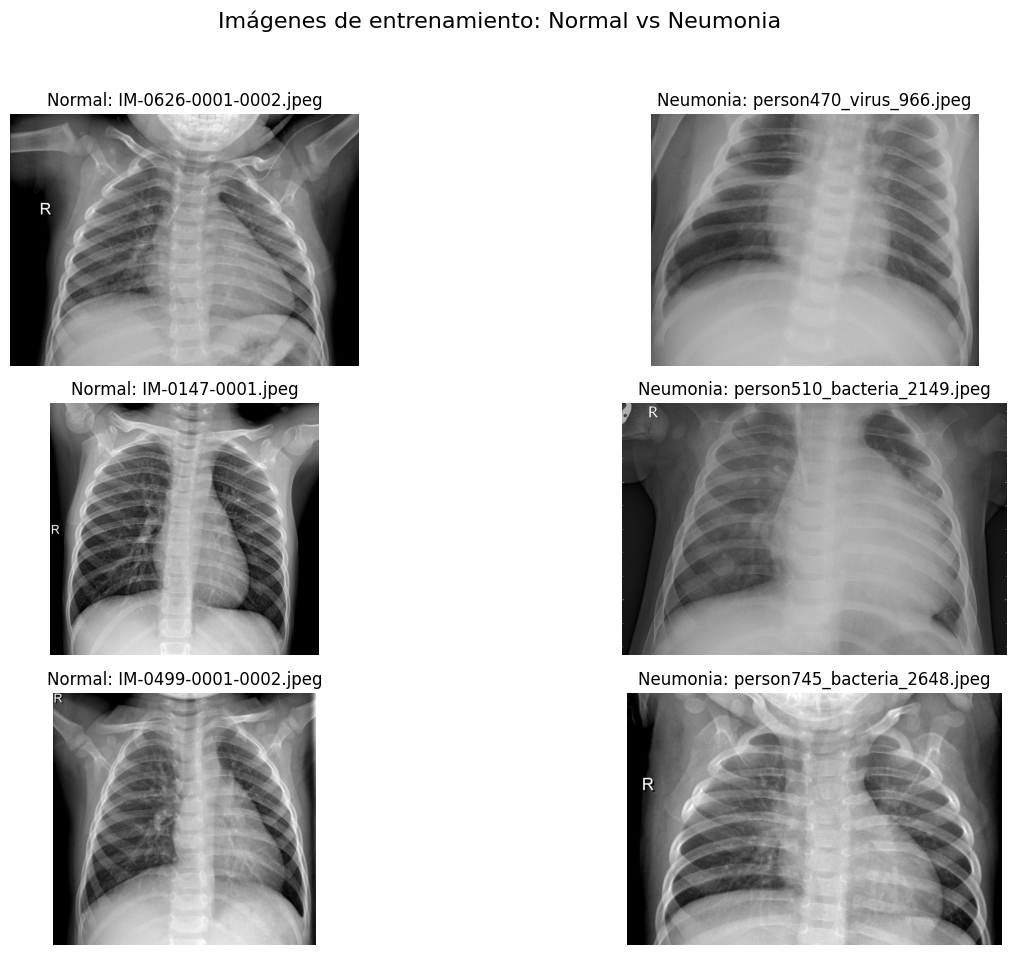

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
for i in range(3):
    # Imagen normal
    img_normal = plt.imread(os.path.join(original_train_normal, random_normal_images[i]))
    axes[i, 0].imshow(img_normal, cmap='gray')
    axes[i, 0].set_title(f'Normal: {random_normal_images[i]}')
    axes[i, 0].axis('off')
    
    # Imagen con neumonia
    img_neumonia = plt.imread(os.path.join(original_train_pneumonia, random_neumonia_images[i]))
    axes[i, 1].imshow(img_neumonia, cmap='gray')
    axes[i, 1].set_title(f'Neumonia: {random_neumonia_images[i]}')
    axes[i, 1].axis('off')
    
plt.suptitle('Imágenes de entrenamiento: Normal vs Neumonia', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Identificación del desequilibrio de clases

In [6]:

# Cantidad de imagenes por clase
for root, dirs, files in os.walk('.'):
    num_files = len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
    if num_files > 0:
        print(f'Folder: {root}, Number of image files: {num_files}')

Folder: ./data/original/test/NORMAL, Number of image files: 234
Folder: ./data/original/test/PNEUMONIA, Number of image files: 390
Folder: ./data/original/train/NORMAL, Number of image files: 1341
Folder: ./data/original/train/PNEUMONIA, Number of image files: 3875
Folder: ./data/original/val/NORMAL, Number of image files: 8
Folder: ./data/original/val/PNEUMONIA, Number of image files: 8


### Cantidad de imagenes por clase

In [7]:
# Grafico de barras para visualizar la cantidad de archivos por carpeta
#un grafico para  tets, otro para train, otro para val
cantidad_test_normal = 0
cantidad_test_anormal = 0
cantidad_train_normal = 0
cantidad_train_anormal = 0
cantidad_val_normal = 0
cantidad_val_anormal = 0

for root, dirs, files in os.walk(carpeta_imagenes_originales+'/test'):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            if 'NORMAL' in root:
                cantidad_test_normal += 1
            elif 'PNEUMONIA' in root:
                cantidad_test_anormal += 1
for root, dirs, files in os.walk(carpeta_imagenes_originales+'/train'):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            if 'NORMAL' in root:
                cantidad_train_normal += 1
            elif 'PNEUMONIA' in root:
                cantidad_train_anormal += 1
for root, dirs, files in os.walk(carpeta_imagenes_originales+'/val'):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            if 'NORMAL' in root:
                cantidad_val_normal += 1
            elif 'PNEUMONIA' in root:
                cantidad_val_anormal += 1
                
print(f'Test - Normal: {cantidad_test_normal}, Anormal: {cantidad_test_anormal}')
print(f'Train - Normal: {cantidad_train_normal}, Anormal: {cantidad_train_anormal}')
print(f'Val - Normal: {cantidad_val_normal}, Anormal: {cantidad_val_anormal}')

labels = ['Normal', 'Neumonia']



Test - Normal: 234, Anormal: 390
Train - Normal: 1341, Anormal: 3875
Val - Normal: 8, Anormal: 8


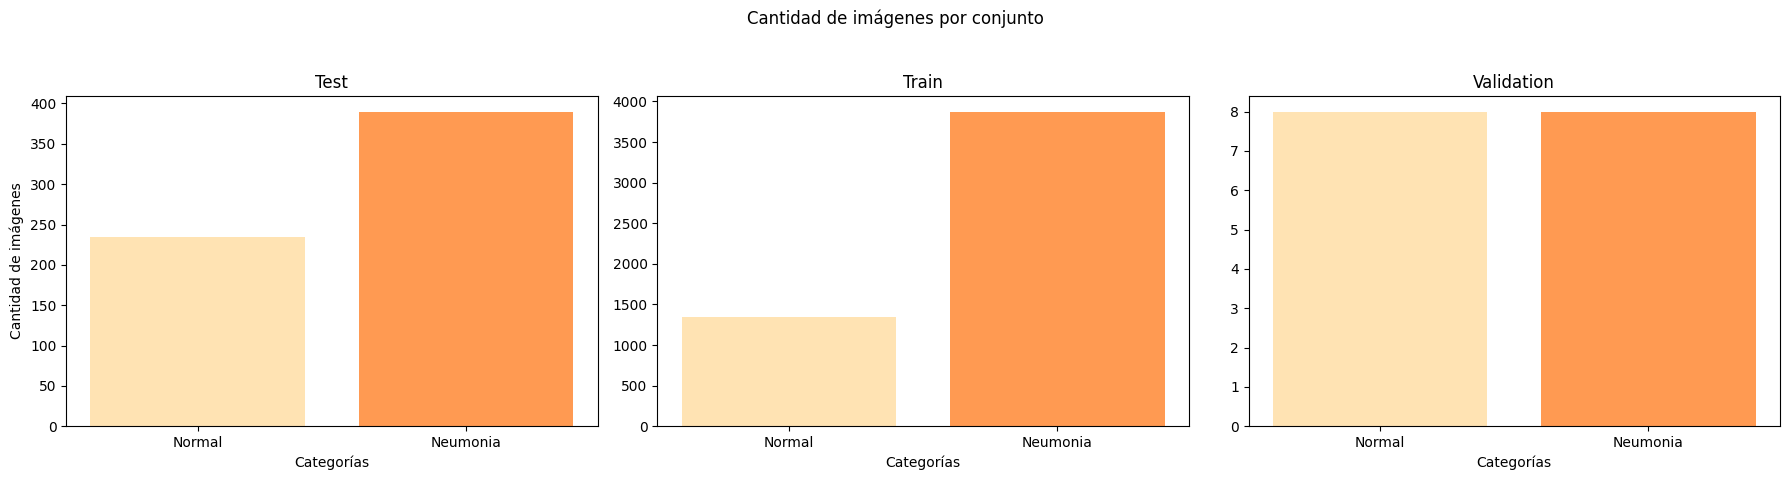

In [8]:
# Mostrar los gráficos de Test, Train y Val uno al lado del otro

labels = ['Normal', 'Neumonia']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Test
axes[0].bar(labels, [cantidad_test_normal, cantidad_test_anormal], color=['#ffe3b3', '#ff9a52'])
axes[0].set_title('Test')
axes[0].set_xlabel('Categorías')
axes[0].set_ylabel('Cantidad de imágenes')
# Train
axes[1].bar(labels, [cantidad_train_normal, cantidad_train_anormal], color=['#ffe3b3', '#ff9a52'])
axes[1].set_title('Train')
axes[1].set_xlabel('Categorías')
# Val
axes[2].bar(labels, [cantidad_val_normal, cantidad_val_anormal], color=['#ffe3b3', '#ff9a52'])
axes[2].set_title('Validation')
axes[2].set_xlabel('Categorías')
plt.suptitle('Cantidad de imágenes por conjunto')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Observaciones:

- En el conjunto de datos de entrenamiento, hay una cantidad significativamente mayor de imágenes de neumonía en comparación con las imágenes normales. Esto indica un desequilibrio de clases que podría afectar el rendimiento del modelo si no se maneja adecuadamente.
  

## Tamaños de las imagenes

In [9]:
#funcion para obtener la dimension de una imagen 
def get_dims(archivo):
    im=plt.imread(archivo)
    alto, ancho = im.shape[:2]
    return alto, ancho

[########################################] | 100% Completed | 4.92 ss
[########################################] | 100% Completed | 4.92 s
[########################################] | 100% Completed | 4.18 ss
[########################################] | 100% Completed | 4.18 s
[########################################] | 100% Completed | 1.96 ss
[########################################] | 100% Completed | 1.96 s
[########################################] | 100% Completed | 1.55 ss
[########################################] | 100% Completed | 1.55 s
[########################################] | 100% Completed | 707.23 ms
[########################################] | 100% Completed | 707.23 ms
[########################################] | 100% Completed | 608.99 ms
[########################################] | 100% Completed | 608.99 ms


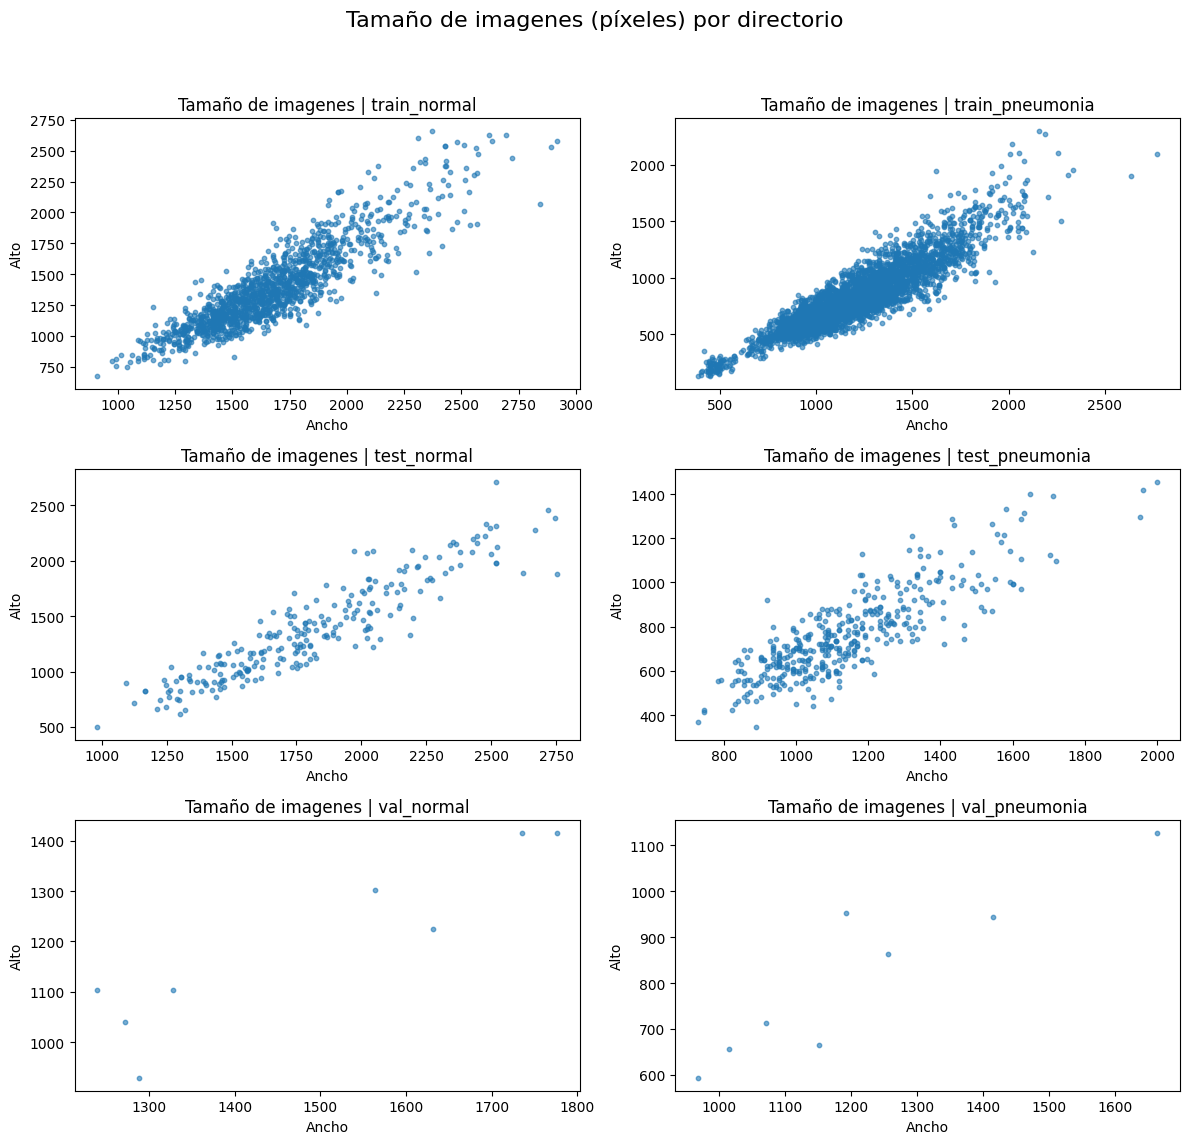

In [14]:
import math
n_dirs = len(directorios)
ncols = 2
nrows = math.ceil(n_dirs / ncols) if n_dirs>0 else 1
fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]
for i, (name, path) in enumerate(directorios.items()):
    ax = axes[i]
    if not os.path.isdir(path):
        ax.set_title(f"{name} (missing)")
        ax.axis('off')
        continue
    filelist = [os.path.join(path, f) for f in os.listdir(path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    if len(filelist) == 0:
        ax.set_title(f"{name} (no images)")
        ax.axis('off')
        continue
    dims = bag.from_sequence(filelist).map(get_dims)
    with diagnostics.ProgressBar():
        dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    ax.scatter(dim_df['width'], dim_df['height'], s=10, alpha=0.6)
    ax.set_title(f'Tamaño de imagenes | {name}')
    ax.set_xlabel('Ancho')
    ax.set_ylabel('Alto')
# hide unused axes
total = nrows * ncols
if total > n_dirs:
    for j in range(n_dirs, total):
        axes[j].axis('off')
plt.suptitle('Tamaño de imagenes (píxeles) por directorio', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()